### I want to predict jobs' salaries, so here are my assumptions about data:
- Job Title changes the salary (it's include senior, jr)
- Job's geographic location can impact the salary
- Company also can impact on salary.

#### This part only wrangling with data according to the assumptions.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\r\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\r\n,TX,1,20,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\r\n\r\n**Please only local can...,4.1,ClearOne Advantage\r\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\r\n,MD,1,12,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\r\nOv...,3.8,Logic20/20\r\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\r\n,CA,0,15,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\r\n\r\nThe Research Scientist I will b...,3.3,Rochester Regional Health\r\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\r\n,NY,1,6,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\r\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\r\n,NY,1,11,1,0,1,0,0


In [4]:
df['Job Title'].value_counts()

Data Scientist                                                               131
Data Engineer                                                                 53
Senior Data Scientist                                                         34
Data Analyst                                                                  15
Senior Data Engineer                                                          14
Senior Data Analyst                                                           12
Lead Data Scientist                                                            8
Sr. Data Engineer                                                              6
Marketing Data Analyst                                                         6
Principal Data Scientist                                                       5
Machine Learning Engineer                                                      5
MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB                                      4
Sr. Data Engineer - Contract

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
#I want anly these job titles
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [9]:
#There are so many senior and junior written diff.
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [11]:
#What about job_state?
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 UT              10
 IN              10
 WI              10
 AZ               9
 MO               9
 AL               8
 MI               6
 GA               6
 KY               6
 DE               6
 IA               5
 CT               5
 NE               4
 OR               4
 LA               4
 KS               3
 NM               3
 MN               2
 ID               2
 RI               1
 SC               1
 Los Angeles      1
Name: job_state, dtype: int64

In [12]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
KY      6
GA      6
DE      6
MI      6
IA      5
CT      5
OR      4
LA      4
NE      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [13]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len'].head()

0    2555
1    4828
2    3495
3    3926
4    2748
Name: desc_len, dtype: int64

In [14]:
#It's important to get number of competitors for job analysis
df.Competitors.value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
Pitney Bowes                                                                                      6
FLURRY, Chartboost                                                                                6
Leidos, CACI International, Booz Allen Hamilton                                                   6


In [15]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [16]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [17]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [19]:
df['company_txt']

0                          Tecolote Research\r
1      University of Maryland Medical System\r
2                                    KnowBe4\r
3                                       PNNL\r
4                         Affinity Solutions\r
5                                   CyrusOne\r
6                         ClearOne Advantage\r
7                                 Logic20/20\r
8                  Rochester Regional Health\r
9                                   <intent>\r
10                                      Wish\r
11                                   ManTech\r
12                                   Walmart\r
13                                    Yesler\r
14                    Takeda Pharmaceuticals\r
15                                   Audible\r
16                       Blueprint Medicines\r
17                                    h2o.ai\r
18                                      Nuna\r
19                        Pinnacol Assurance\r
20                                     Porch\r
21           

In [20]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

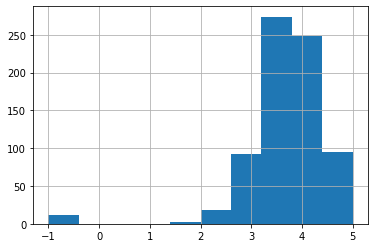

In [22]:
df.Rating.hist()

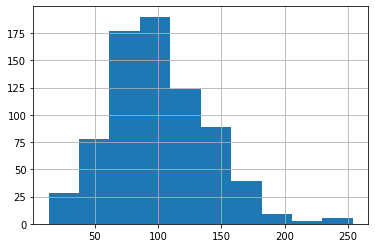

In [23]:
df.avg_salary.hist()

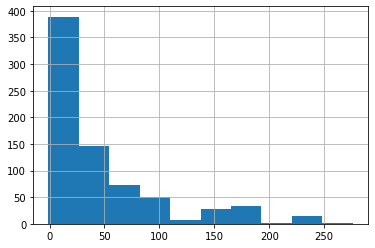

In [24]:
df.age.hist()

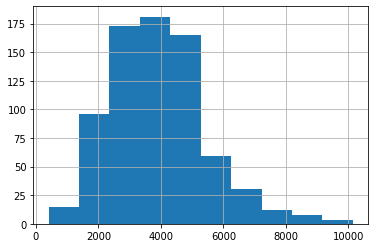

In [25]:
df.desc_len.hist()

In [26]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


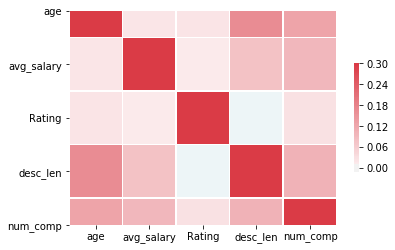

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 20


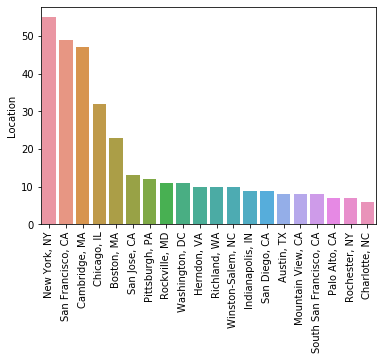

graph for Headquarters: total = 20


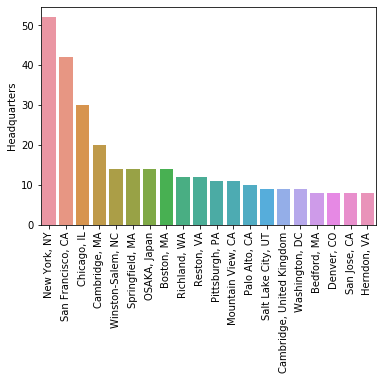

graph for company_txt: total = 20


C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Toshiba\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


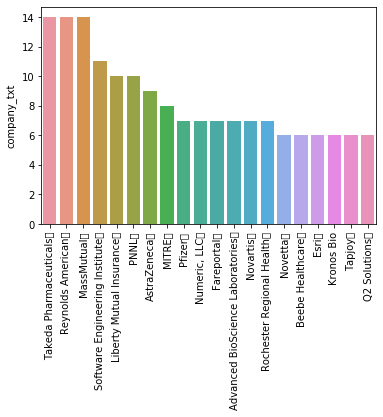

In [29]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [32]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
...                              ...
IA        data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.250000
AZ        data scientist   69.500000
          data engineer    79.500000
          analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [33]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [36]:
df.to_csv('wrangled_data.csv')